Positive tweets percentage: 36.0 %
Negative tweets percentage: 15.0 %
Neutral tweets percentage: 49.0 %


Positive tweets:
@marklutchman We will welcome more prosperous times Republicans for the most part are good people Paul Ryan is gone… https://t.co/hcoS5TBrww
RT @GOPChairwoman: “The very first action that @realDonaldTrump did was condemn these heinous acts. The very first thing that the media did…
RT @realDonaldTrump: Martha McSally is a great warrior, her opponent a Nancy Pelosi Wacko! https://t.co/QEUdPWDDud
RT @Farberyanki: I'm a Jew and I've never heard of these "leaders". Most Orthodox Jews support @realDonaldTrump. https://t.co/QKYgFBVIi7
RT @tedlieu: Dear @realDonaldTrump: The media did not say the below. YOU did:

"Any guy who can do a body slam is my kind of guy"

"Very fi…
RT @tedlieu: Dear @realDonaldTrump: The media did not say the below. YOU did:

"Any guy who can do a body slam is my kind of guy"

"Very fi…
RT @tedlieu: Dear @realDonaldTrump: The media did not say the

C:\Users\manoj\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


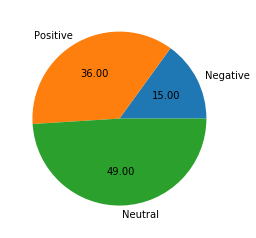

Positive tweets percentage: 43.1578947368421 %
Negative tweets percentage: 16.842105263157894 %
Neutral tweets percentage: 40.0 %


Positive tweets:
@Amylgil @HillaryClinton I guess Hillary won't be getting her own talk show on NBC. #FakeNews #Libtards… https://t.co/Qrwd08DLb0
@JoanneTirado09 @Ruthperricone Harry Truman stated it perfectly.  @NancyPelosi @MaxineWaters @HillaryClinton… https://t.co/3Wro0O7Rjv
RT @poconomtn: @hidehunt1 @HillaryClinton @JesusChristTips She looks better in this pic..I just can’t put my finger on it 🤔🤔🤔
@TheDemocrats are the TRUE racists. Let's not forget that @HillaryClinton 's mentor, Byrd was a Grand Wizard of the… https://t.co/bj1p7cazeA
RT @nedryun: Wow. “They all look alike” says @HillaryClinton in referencing two black men. . . Oh, OK. #maga #tcot https://t.co/bLDNyygngj
RT @HillaryClinton: I'm thrilled today to endorse 19 @runforsomething candidates. These thoughtful young people are committed to serving th…
#Racism is only acceptable if a #Lefty ex

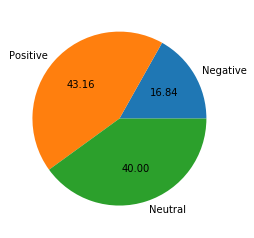

In [2]:
import re
from textblob import TextBlob
import base64
import requests
import matplotlib.pyplot as plt

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w+:\ / \ / \S+)", " ", tweet).split())


def get_tweet_sentiment(tweet):
    # create TextBlob object of passed tweet text
    analysis = TextBlob(clean_tweet(tweet))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'


def main():
    
    
    consumer_key = "6xBBCEPMnPspyu326TpmkzCGN"
    consumer_secret = "MxvbtzHp5Q8eELG4bbluq4IbHjk3kcqmVJUuu7dzilJA6TyfRt"

    key_secret = '{}:{}'.format(consumer_key, consumer_secret).encode('ascii')
    b64_encoded_key = base64.b64encode(key_secret)
    b64_encoded_key = b64_encoded_key.decode('ascii')
    base_url = 'https://api.twitter.com/'
    auth_url = '{}oauth2/token'.format(base_url)
    auth_headers = {
        'Authorization': 'Basic {}'.format(b64_encoded_key),
        'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'
    }
    auth_data = {
        'grant_type': 'client_credentials'
    }

    auth_response = requests.post(auth_url, headers=auth_headers, data=auth_data)
    auth_response.json().keys()
    access_token = auth_response.json()['access_token']

    search_headers = {
        'Authorization': 'Bearer {}'.format(access_token)
    }
    search_params = {
        'query': '@realDonaldTrump',
        "fromDate": "201709200000",
        'toDate' : "201810300000"
        # 'until': '2014-11-11'
    }
    search_url = '{}1.1/tweets/search/fullarchive/devFull.json'.format(base_url)
    search_response = requests.get(search_url, headers=search_headers, params=search_params)
    search_data = search_response.json()
    fetched_tweets = search_data['results']

    tweets = []
    for tweet in fetched_tweets:
        # empty dictionary to store required params of a tweet
        parsed_tweet = {}

        # saving text of tweet
        parsed_tweet['text'] = tweet['text']
        # saving sentiment of tweet
        parsed_tweet['sentiment'] = get_tweet_sentiment(tweet['text'])

        # appending parsed tweet to tweets list
        if tweet['retweet_count'] > 0:
            # if tweet has retweets, ensure that it is appended only once
            if parsed_tweet not in tweets:
                tweets.append(parsed_tweet)
        else:
            tweets.append(parsed_tweet)

    # picking positive tweets from tweets
    positive_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100 * len(positive_tweets) / len(tweets)))
    # picking negative tweets from tweets
    negative_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100 * len(negative_tweets) / len(tweets)))
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} %".format(100 * (len(tweets) - len(negative_tweets) - len(positive_tweets)) / len(tweets)))
    # print(tweets + negative_tweets + positive_tweets)

    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in positive_tweets[:10]:
        print(tweet['text'])

    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in negative_tweets[:10]:
        print(tweet['text'])

    sizes = [len(negative_tweets), len(positive_tweets), (len(tweets) - len(negative_tweets) - len(positive_tweets))]
    labels = ["Negative", "Positive", "Neutral"]

    plt.pie(sizes, labels=labels, autopct="%.2f")
    plt.axes().set_aspect("equal")
    plt.show()
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    consumer_key = "6xBBCEPMnPspyu326TpmkzCGN"
    consumer_secret = "MxvbtzHp5Q8eELG4bbluq4IbHjk3kcqmVJUuu7dzilJA6TyfRt"

    key_secret = '{}:{}'.format(consumer_key, consumer_secret).encode('ascii')
    b64_encoded_key = base64.b64encode(key_secret)
    b64_encoded_key = b64_encoded_key.decode('ascii')
    base_url = 'https://api.twitter.com/'
    auth_url = '{}oauth2/token'.format(base_url)
    auth_headers = {
        'Authorization': 'Basic {}'.format(b64_encoded_key),
        'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'
    }
    auth_data = {
        'grant_type': 'client_credentials'
    }

    auth_response = requests.post(auth_url, headers=auth_headers, data=auth_data)
    auth_response.json().keys()
    access_token = auth_response.json()['access_token']

    search_headers = {
        'Authorization': 'Bearer {}'.format(access_token)
    }
    search_params = {
        'query': '@HillaryClinton',
        "fromDate": "201709200000",
        'toDate' : "201810300000"
        # 'until': '2014-11-11'
    }
    search_url = '{}1.1/tweets/search/fullarchive/devFull.json'.format(base_url)
    search_response = requests.get(search_url, headers=search_headers, params=search_params)
    search_data = search_response.json()
    fetched_tweets = search_data['results']

    tweets = []
    for tweet in fetched_tweets:
        # empty dictionary to store required params of a tweet
        parsed_tweet = {}

        # saving text of tweet
        parsed_tweet['text'] = tweet['text']
        # saving sentiment of tweet
        parsed_tweet['sentiment'] = get_tweet_sentiment(tweet['text'])

        # appending parsed tweet to tweets list
        if tweet['retweet_count'] > 0:
            # if tweet has retweets, ensure that it is appended only once
            if parsed_tweet not in tweets:
                tweets.append(parsed_tweet)
        else:
            tweets.append(parsed_tweet)

    # picking positive tweets from tweets
    positive_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100 * len(positive_tweets) / len(tweets)))
    # picking negative tweets from tweets
    negative_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100 * len(negative_tweets) / len(tweets)))
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} %".format(100 * (len(tweets) - len(negative_tweets) - len(positive_tweets)) / len(tweets)))
    # print(tweets + negative_tweets + positive_tweets)

    # printing first 5 positive tweets
    print("\n\nPositive tweets:")
    for tweet in positive_tweets[:10]:
        print(tweet['text'])

    # printing first 5 negative tweets
    print("\n\nNegative tweets:")
    for tweet in negative_tweets[:10]:
        print(tweet['text'])

    sizes = [len(negative_tweets), len(positive_tweets), (len(tweets) - len(negative_tweets) - len(positive_tweets))]
    labels = ["Negative", "Positive", "Neutral"]

    plt.pie(sizes, labels=labels, autopct="%.2f")
    plt.axes().set_aspect("equal")
    plt.show()

if __name__ == "__main__":
    main()